In [48]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

all = pd.read_csv('../expedia_data/all_data.csv')
all.head()

print('Dataset has %d record'%len(all))
print('Dataset has %d search_id (accounts)'%len(all['srch_id'].unique().tolist()))

Dataset has 908750 record
Dataset has 36518 search_id (accounts)


In [49]:
# get sampled data
def get_sampled_data(size, data):
    '''
    This function takes in the whole dataset, 
    and outout a sampled subset with data size specified
    '''
    interval_range = len(data)//size
    mid_idx_lst = []
    for i in range(1,size+1):
        mid_idx = (interval_range*(i-1) + interval_range*i)//2
        mid_idx_lst.append(mid_idx)

#     print(mid_idx_lst[0],mid_idx_lst[-1])
    data_sampled = data.iloc[mid_idx_lst]
    return data_sampled
    
sampled = get_sampled_data(5000, all)

In [3]:
### updated v2: keep "datetime" in training process
### drop "datetime" 
# sampled = sampled.drop(columns = ['date_time'])
# sampled.head()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,new_comp5_rate_percent_diff,new_comp6_rate,new_comp6_inv,new_comp6_rate_percent_diff,new_comp7_rate,new_comp7_inv,new_comp7_rate_percent_diff,new_comp8_rate,new_comp8_inv,new_comp8_rate_percent_diff
90,7086,24,216,4.50,745.42,220,131958,4,4.0,1,...,0,0,0,0,0,0,0,0,0,0
271,307902,24,216,NaN,NaN,164,138356,4,4.5,0,...,0,0,0,0,0,0,0,0,0,0
452,349474,24,216,3.28,107.96,215,50818,4,4.0,1,...,0,0,0,0,1,1,0,0,0,0
633,26168,32,220,NaN,NaN,219,91206,2,3.5,1,...,0,0,0,0,0,0,0,1,1,0
814,435038,24,216,NaN,NaN,196,99532,4,3.0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
### handle NA values
sampled = sampled.fillna(sampled.median())
sampled.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,new_comp5_rate_percent_diff,new_comp6_rate,new_comp6_inv,new_comp6_rate_percent_diff,new_comp7_rate,new_comp7_inv,new_comp7_rate_percent_diff,new_comp8_rate,new_comp8_inv,new_comp8_rate_percent_diff
90,7086,2012-11-01 00:06:20,24,216,4.500,745.42,220,131958,4,4.0,...,0,0,0,0,0,0,0,0,0,0
271,307902,2012-11-01 00:12:06,24,216,3.275,138.34,164,138356,4,4.5,...,0,0,0,0,0,0,0,0,0,0
452,349474,2012-11-01 00:22:43,24,216,3.280,107.96,215,50818,4,4.0,...,0,0,0,0,1,1,0,0,0,0
633,26168,2012-11-01 00:35:47,32,220,3.275,138.34,219,91206,2,3.5,...,0,0,0,0,0,0,0,1,1,0
814,435038,2012-11-01 00:47:56,24,216,3.275,138.34,196,99532,4,3.0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
def split_data(data):
    '''
    This function takes in the whole data set and divide it into training, validation and test data;
    split into 0.8 and 0.2 first; second split using the same ratio into training and valiation
    '''
    training_size_large = int(len(data) * 0.8)   
    validation_size = int(training_size_large * 0.2)
    training_size = training_size_large - validation_size
    test_size = int(len(data) * 0.2)
    
    print('training size: %d'%training_size)
    print('validation size: %d'%validation_size)
    print('test size: %d'%test_size)
    
    # split data manually
    training_data = data[0: training_size]
    validation_data = data[training_size:(training_size + validation_size)]
    test_data = data[(training_size + validation_size): (training_size + validation_size + test_size)]
    
    return training_data, validation_data, test_data
    
training, validation, test = split_data(sampled)


# X_train = training[variables].values
# y_train = training['price_usd'].values

# X_val = validation[variables].values
# y_val = validation['price_usd'].values

# X_test = test[variables].values
# y_test = test['price_usd'].values


### remain 'date_time' in training model
variables = [col for col in all.columns.unique().tolist() if col not in ['price_usd','date_time']]
# variables = [col for col in all.columns.unique().tolist() if col not in ['price_usd']]

### keep variable names in df
X_train = training[variables]
y_train = training['price_usd']

X_val = validation[variables]
y_val = validation['price_usd']

X_test = test[variables]
y_test = test['price_usd']

training size: 3200
validation size: 800
test size: 1000


In [96]:
'''
need to do autoencoder for each categorical variable, instead of just feeding into one neural network
'''
# get categorical variables
categorical_vars = ['srch_id','site_id','visitor_location_country_id','visitor_hist_starrating','prop_country_id','prop_id','prop_starrating',
'srch_destination_id']
other_cols = [col for col in variables if col not in categorical_vars]

In [97]:
### break variables into three types
# get categorical binary variables
categorical_binary_vars = []
categorical_binary_vars += ['promotion_flag']
categorical_binary_vars += [col for col in sampled if col.startswith('new')]
categorical_binary_vars += [col for col in sampled if col.endswith('inv')]
categorical_binary_vars += [col for col in sampled if col.endswith('bool')]

# get continous variables
continous_vars = [ col for col in variables if (col not in categorical_binary_vars) & (col not in categorical_vars )]

In [98]:
print ("categorical binary vars: ", len(categoical_binary_vars))
print ("categorical non binary vars: ", len(categorical_vars))
print ("continues vars: ", len(continous_vars))

categorical binary vars:  200
categorical non binary vars:  8
continues vars:  28


In [99]:
def preproc(X_train) : 
    input_list_train = []
    for c in categoical_vars :
        vals = np.asarray(X_train[c].tolist())
        vals = pd.factorize( vals )[0]  # encode object as categorical type, return labels
        input_list_train.append( np.asarray(vals)  )
    
    #the rest of the columns
    input_list_train.append(X_train[other_cols].values)  # add values of the other 71 variables
    return input_list_train   # return is a list of arrays

In [100]:
# check the number of unique values in each categorical variable
for cat_var in categorical_vars:
    print (cat_var, sampled[cat_var].nunique())

srch_id 5000
site_id 32
visitor_location_country_id 103
visitor_hist_starrating 113
prop_country_id 97
prop_id 4488
prop_starrating 6
srch_destination_id 2194


In [101]:
df_tr = X_train
df_val = X_val

In [102]:
df_tr_modified = preproc( df_tr )
df_val = preproc( df_val )

In [110]:
# checking
print(len(df_tr_modified))
print(len(df_tr_modified[0]))

print(df_tr_modified[0])
print(df_tr_modified[-1]) # check the "other" columns

print(df_tr_modified[0].shape)
print(df_tr_modified[-1].shape)

[[745.42   4.     1.   ...   0.     0.     0.  ]
 [138.34   4.5    0.   ...   0.     0.     0.  ]
 [107.96   4.     1.   ...   0.     0.     0.  ]
 ...
 [138.34   4.     1.   ...   0.     0.     0.  ]
 [138.34   3.5    0.   ...   0.     1.     1.  ]
 [138.34   3.     1.   ...   0.     0.     0.  ]]
[[745.42   4.     1.   ...   0.     0.     0.  ]
 [138.34   4.5    0.   ...   0.     0.     0.  ]
 [107.96   4.     1.   ...   0.     0.     0.  ]
 ...
 [138.34   4.     1.   ...   0.     0.     0.  ]
 [138.34   3.5    0.   ...   0.     1.     1.  ]
 [138.34   3.     1.   ...   0.     0.     0.  ]]
(3200, 70)
(3200, 70)


In [104]:
from keras.layers import *
from keras.models import Sequential
'''
get model for each categorical variable, and append to a list called 'models'
'''

models = []
for categorical_var in categorical_vars :
    print ("------------------------------------------------------------------")
    print ("for categorical column ", categorical_var)
    model = Sequential()
    no_of_unique_cat  = sampled[categorical_var].nunique()
    print ("number of unique cat",no_of_unique_cat)
    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50 )  # define embedding size
    embedding_size = int(embedding_size)
    print ("embedding_size set as ", embedding_size)
    model.add(  Embedding( no_of_unique_cat+1, embedding_size, input_length = 1 ) )
    
    model.add(Reshape(target_shape=( [embedding_size] )))
    
    print (model.summary())
    
    models.append( model )

------------------------------------------------------------------
for categorical column  srch_id
number of unique cat 5000
embedding_size set as  50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 1, 50)             250050    
_________________________________________________________________
reshape_41 (Reshape)         (None, 50)                0         
Total params: 250,050
Trainable params: 250,050
Non-trainable params: 0
_________________________________________________________________
None
------------------------------------------------------------------
for categorical column  site_id
number of unique cat 32
embedding_size set as  16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_42 (Embedding)     (None, 1, 16)             528       
_____________________________

In [105]:
# add a single model for all other numeric variables
model_rest = Sequential()
model_rest.add(Dense(16, input_shape = [3] ))  # need to change input_shape? (tutorial里面是0,1,2为categorical variables, 3为other variable)
model_rest.summary() 
models.append(model_rest)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 16)                64        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [106]:
models

In [120]:
categorical_var = categorical_vars[0]
no_of_unique_cat  = sampled[categorical_var].nunique()
print ("number of unique cat",no_of_unique_cat)
embedding_size = min(np.ceil((no_of_unique_cat)/2), 50)    

number of unique cat 5000


In [121]:
# TODO: merge all models into single model

inlayer_cat = Input(shape=(1, 70))  # TODO: need to change 'shape' setting accordingly
inlayer_other = Input(shape=(3200, 70))

tensors = []
for categorical_var in categorical_vars :
    print ("------------------------------------------------------------------")

    no_of_unique_cat  = sampled[categorical_var].nunique()
    print ("number of unique cat",no_of_unique_cat)

    embedding_size = min(np.ceil((no_of_unique_cat)/2), 50)    
    embedding_size = int(embedding_size)
    print ("embedding_size set as ", embedding_size)

    tensor_cat = Embedding(no_of_unique_cat+1, embedding_size, input_length = 1)(inlayer_cat)
    tensor_cat = Reshape(target_shape=([embedding_size]))(tensor_cat)
    tensors.append(tensor_cat)

tensor_other = Dense(16, input_shape = [3])(inlayer_other)
tensors.append(tensor_other)
print(tensors)

model_concat = concatenate(tensors)

------------------------------------------------------------------
number of unique cat 5000
embedding_size set as  50


ValueError: "input_length" is 1, but received input has shape (None, 1, 70)

参考：
model.add() --> https://keras.io/layers/merge/ <br>
https://stackoverflow.com/questions/51075666/how-to-implement-merge-from-keras-layers <br>
https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc  <br>
https://keras.io/layers/embeddings/ <br>
https://keras.io/getting-started/sequential-model-guide/ <br>


以下需修改：先将training data转化成one-hot encoding,再整体放入autoencoder

(3200, 78)
(800, 78)
Epoch 1/20
3200/3200 [==============================] - 1s 195us/step - loss: 0.1824
Epoch 2/20
3200/3200 [==============================] - 0s 25us/step - loss: 0.0807
Epoch 3/20
3200/3200 [==============================] - 0s 25us/step - loss: 0.0645
Epoch 4/20
3200/3200 [==============================] - 0s 26us/step - loss: 0.0622
Epoch 5/20
3200/3200 [==============================] - 0s 26us/step - loss: 0.0609
Epoch 6/20
3200/3200 [==============================] - 0s 25us/step - loss: 0.0591
Epoch 7/20
3200/3200 [==============================] - 0s 27us/step - loss: 0.0554
Epoch 8/20
3200/3200 [==============================] - 0s 30us/step - loss: 0.0524
Epoch 9/20
3200/3200 [==============================] - 0s 28us/step - loss: 0.0509
Epoch 10/20
3200/3200 [==============================] - 0s 30us/step - loss: 0.0501
Epoch 11/20
3200/3200 [==============================] - 0s 27us/step - loss: 0.0493
Epoch 12/20
3200/3200 [=============================

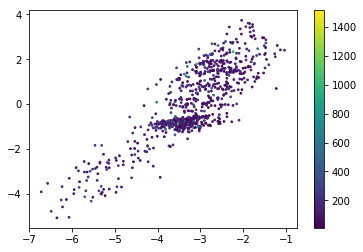

In [7]:
### autoencoder
'''
updated: this function only fits input variables are all numeric
example given in tutorial focus of image classification problem, is quite different
'''

import numpy as np
np.random.seed(1337)  # for reproducibility
 
from keras.datasets import mnist
from keras.models import Model #泛型模型
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
 
# X shape (60,000 28x28), y shape (10,000, )
# (x_train, _), (x_test, y_test) = mnist.load_data()
 
# normalize input data(min-max scaler)
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))

print(X_train.shape)
print(X_val.shape)

# 压缩特征维度至2维   ### can change the hidden layer dimensions --> as input for modeling
encoding_dim = 2
# encoding_dim = 50

# this is our input placeholder
input_img = Input(shape=(78,))

# 编码层
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)

# 解码层
decoded = Dense(10, activation='relu')(encoder_output)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(78, activation='tanh')(decoded)

# 构建自编码模型
autoencoder = Model(inputs=input_img, outputs=decoded)

# 构建编码模型
encoder = Model(inputs=input_img, outputs=encoder_output)

# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# training
autoencoder.fit(X_train, X_train, epochs=20, batch_size=256, shuffle=True)

# plotting 
encoded_imgs = encoder.predict(X_val)
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_val, s=3)
plt.colorbar()
plt.show()


In [58]:
X_train_autoencoder = encoder.predict(X_train)
X_train_autoencoder.shape

X_val_autoencoder = encoder.predict(X_val)
X_val_autoencoder.shape

# X_test_autoencoder = encoder.predict(X_test)

(800, 2)

In [56]:
### XGboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train_autoencoder,y_train)
preds = xg_reg.predict(X_val_autoencoder)
rmse_val = np.sqrt(mean_squared_error(y_val, preds))
print("validation RMSE: %f" % (rmse_val))

preds = xg_reg.predict(X_train_autoencoder)
rmse_train = np.sqrt(mean_squared_error(y_train, preds))
print("training RMSE: %f" % (rmse_train))

validation RMSE: 141.234186
training RMSE: 3589.716625


In [62]:
### Ridge regression (with normalized input features)
# normalize data before fitting into Ridge
from sklearn.preprocessing import Normalizer
normalizer = Normalizer().fit(X_train_autoencoder) 
X_train_autoencoder = normalizer.transform(X_train_autoencoder)
X_val_autoencoder = normalizer.transform(X_val_autoencoder)
# X_test_autoencoder = normalizer.transform(X_test_autoencoder)

In [63]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X_train_autoencoder,y_train)
y_pred = model_ridge.predict(X_val_autoencoder)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print('validation RMSE: %d '%rmse_val)

validation RMSE: 194 


In [ ]:
y_pred = model_ridge.predict(X_train_autoencoder)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))
print('validation RMSE: %d '%rmse_val)